# Stroke prediction

## Definição do problema

Análise exploratória do dataset contendo informações médicas e condições de pacientes em que alguns sofreram AVC. Iremos verificar o dataset a fim de relacionar tais condições com a possibilidade do paciente sofre um derrame cerebral.

## Coleta de dados

cerebral stroke prediction based on imbalanced medical dataset

 [Data for: A hybrid machine learning approach to cerebral stroke prediction based on imbalanced medical-datasets](https://data.mendeley.com/datasets/x8ygrw87jw/1)

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Carregando o dataset

In [2]:
df = pd.read_csv('../data/dataset.csv')
print(df.shape)
df.head()

(43400, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


## Limpeza da base

In [3]:
df['id'].nunique()

43400

Não há duplicações nos registros, então podemos dropar a coluna, já que não trás nenhuma informação nova

In [4]:
df.drop(columns=['id'], inplace=True) # dropando coluna id

print(df.shape)
df.head()

(43400, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
df.info() # verificando os tipos das colunas do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [6]:
## Verificando os missing values

df.isnull().sum()/ df.shape[0] * 100

gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

In [7]:
## Substituir os missing values pela média e moda para as colunas bmi e smoking_status, respectivamente.

mode_smoking = df['smoking_status'].mode()[0]
df['smoking_status'].fillna(mode_smoking, inplace=True)

mode_smoking = df['bmi'].mean()
df['bmi'].fillna(mode_smoking, inplace=True)

## Verificando os missing values

df.isnull().sum()/ df.shape[0] * 100

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

## Análise Exploratória dos Dados

Iremos explorar as variáveis de forma mais detalhada, descrevendo sua distribuição em variados casos. Em seguida, tratremos de popular as correlações entre estas variáveis e explorar os insights pertinentes para a construção de um modelo.

### Visão estatística

In [8]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.638023,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.400000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.600000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


### Histogramas

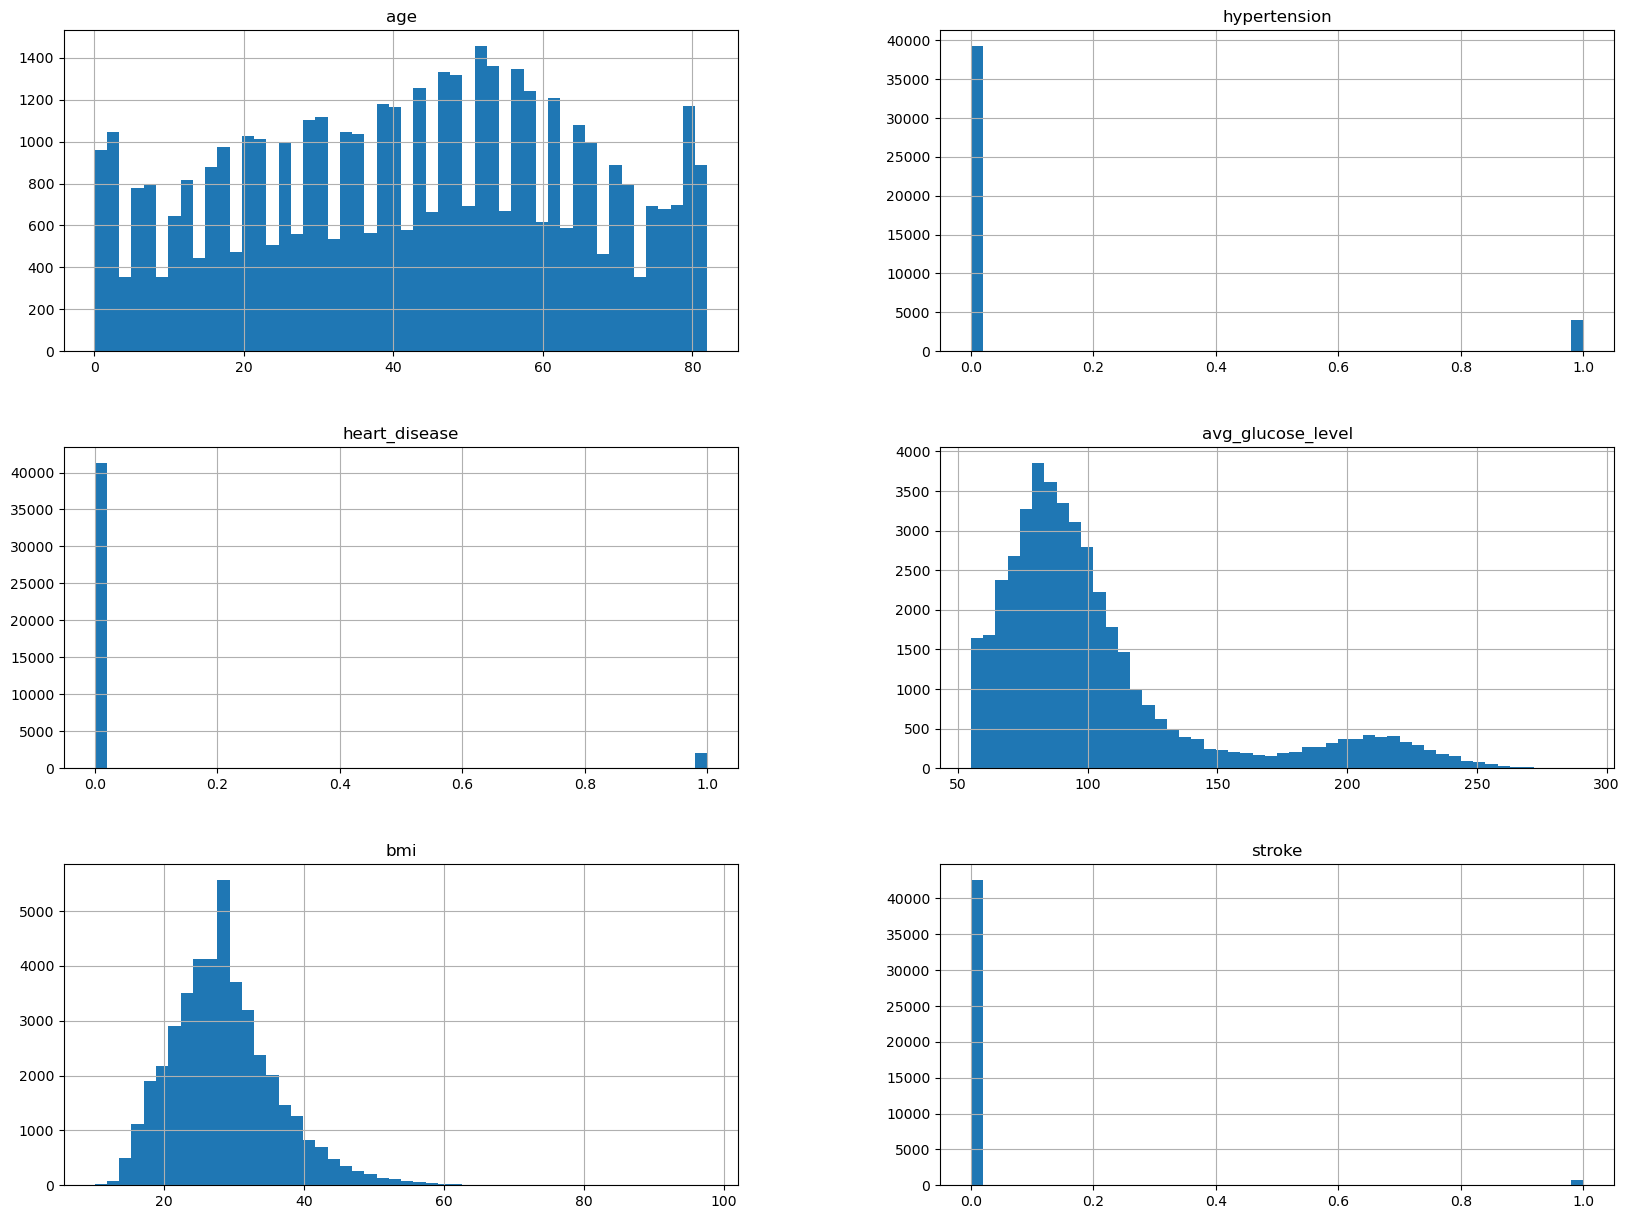

In [9]:
df.hist(figsize=(20,15), bins=50)
plt.show()

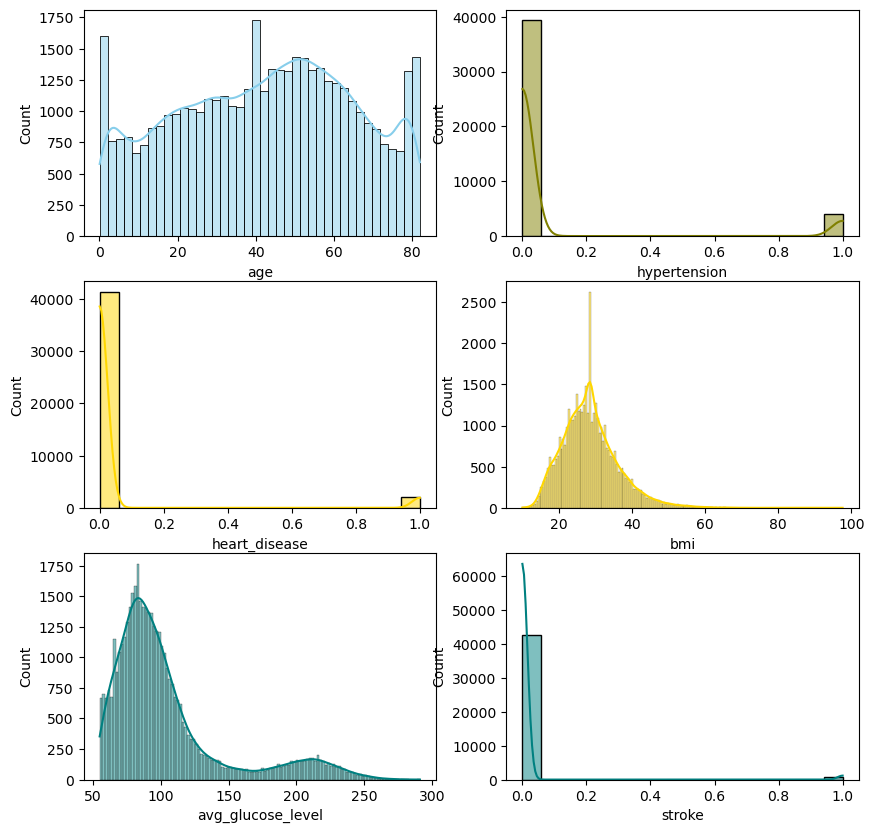

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

sns.histplot(data=df, x="age", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="hypertension", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="heart_disease", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="bmi", kde=True, color="gold", ax=axs[1, 1])
sns.histplot(data=df, x="avg_glucose_level", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=df, x="stroke", kde=True, color="teal", ax=axs[2, 1])

plt.show()

# fig, axs = plt.subplots(2, 2, figsize=(7, 7))

# sns.histplot(data=df, x="sepal_length", kde=True, color="skyblue", ax=axs[0, 0])
# sns.histplot(data=df, x="sepal_width", kde=True, color="olive", ax=axs[0, 1])
# sns.histplot(data=df, x="petal_length", kde=True, color="gold", ax=axs[1, 0])
# sns.histplot(data=df, x="petal_width", kde=True, color="teal", ax=axs[1, 1])

# plt.show()

- Escrever conclusão sobre distribuição da idade para stroke/ no stroke
- Distribuição das variaveis categóricas
- analise de outliers (ex: avg_glucose_levels)
- Após analise individual, fazer correlação entre variaveis

- Temos uma distribuição praticamente uniforme de idade para todos os casos, tendo AVC ou não
- Iremos explorar as variáveis individualmente para detalhar as distribuições nos casos de ocorrência de AVC

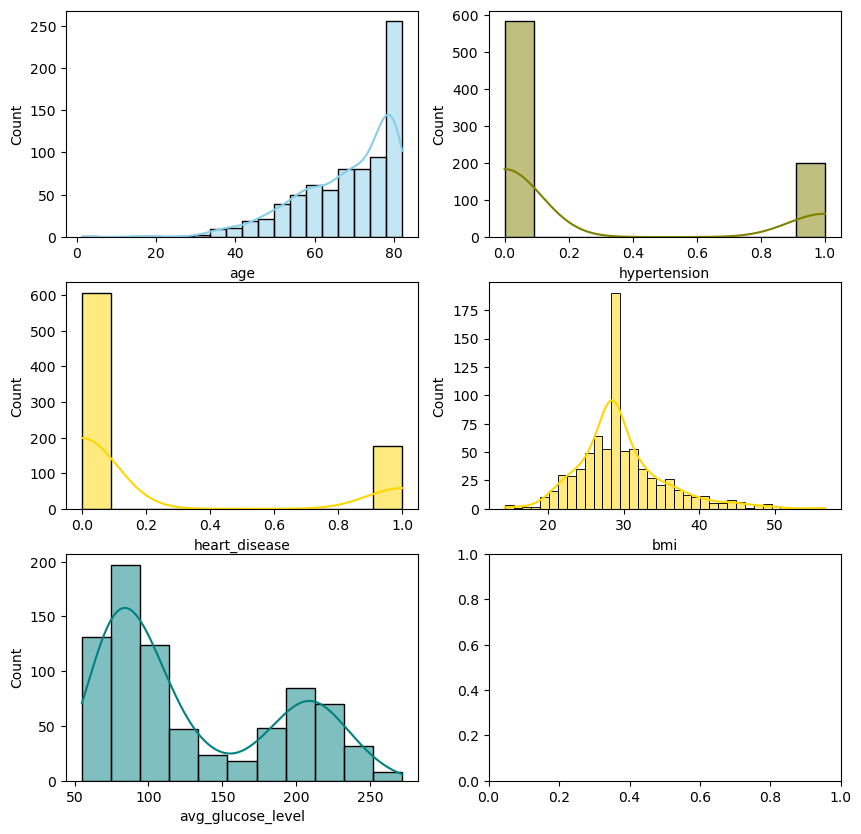

In [22]:
test_strokes_only = df['stroke'] == 1 # teste para os casos de ocorrencia de avc
df_stroke = df[test_strokes_only] #criamos um df apenas para os casos de avc positivo (=1)

# plota os histogramas das colunas não-categóricas nos casos positivos de avc
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

sns.histplot(data=df_stroke, x="age", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_stroke, x="hypertension", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df_stroke, x="heart_disease", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df_stroke, x="bmi", kde=True, color="gold", ax=axs[1, 1])
sns.histplot(data=df_stroke, x="avg_glucose_level", kde=True, color="teal", ax=axs[2, 0])
# sns.histplot(data=df_stroke, x="stroke", kde=True, color="teal", ax=axs[2, 1])

plt.show()

In [21]:
df_stroke.describe()

200


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.0
mean,68.143448,0.255428,0.226054,129.582669,29.642280,1.0
std,12.316537,0.436380,0.418542,59.734073,5.769294,0.0
min,1.320000,0.000000,0.000000,55.010000,14.300000,1.0
25%,60.000000,0.000000,0.000000,80.990000,26.400000,1.0
50%,71.000000,0.000000,0.000000,104.470000,28.605038,1.0
75%,79.000000,1.000000,0.000000,192.360000,31.900000,1.0
max,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


- Vimos que a distribuição de idade muda drasticamente com o 1º quartil saindo de 25 anos para 60 anos e a média saindo de 42 para 68 anos. Constatamos que os casos de AVC ocorrem com a parcela da população mais velha, corroborando o senso comum.
- Comparamos os casos de hipertensão e doenças cardíacas com os valores da distribuição de todo o dataset

In [27]:
hypertension_total = df['hypertension'].value_counts()
cardiac_disease = df['heart_disease'].value_counts()
hypertension_total[1]/hypertension_total[0]

0.10323089046493301